In [0]:
# if your keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## **1. Architecture 1: Two Hidden Layers (784-256-64-10)**

With Batch Normalization and Dropout

In [19]:
model_relu_1 = Sequential()

model_relu_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer='glorot_normal'))
model_relu_1.add(BatchNormalization())
model_relu_1.add(Dropout(0.5))

model_relu_1.add(Dense(64, activation='relu', kernel_initializer='glorot_normal'))
model_relu_1.add(BatchNormalization())
model_relu_1.add(Dropout(0.5))

model_relu_1.add(Dense(output_dim, activation='softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [22]:
model_relu_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 6s 98us/step - loss: 0.5515 - acc: 0.8337 - val_loss: 0.1715 - val_acc: 0.9484
Epoch 2/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2734 - acc: 0.9208 - val_loss: 0.1290 - val_acc: 0.9592
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2108 - acc: 0.9386 - val_loss: 0.1136 - val_acc: 0.9663
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1841 - acc: 0.9476 - val_loss: 0.0983 - val_acc: 0.9706
Epoch 5/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1646 - acc: 0.9522 - val_loss: 0.0894 - val_acc: 0.9735
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.1500 - acc: 0.9566 - val_loss: 0.0833 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==

Test Score:  0.06807973722481983
Test Accuracy:  0.9798


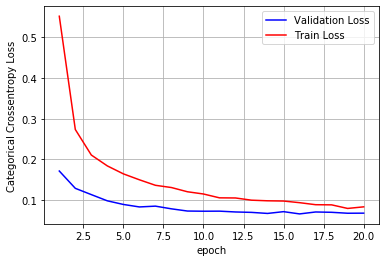

In [23]:
score = model_relu_1.evaluate(X_test, Y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Without Batch Normalization and Dropout

In [0]:
model_relu_1 = Sequential()

model_relu_1.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer='glorot_normal'))

model_relu_1.add(Dense(64, activation='relu', kernel_initializer='glorot_normal'))

model_relu_1.add(Dense(output_dim, activation='softmax'))

In [25]:
model_relu_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2834 - acc: 0.9189 - val_loss: 0.1421 - val_acc: 0.9574
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1117 - acc: 0.9670 - val_loss: 0.0968 - val_acc: 0.9692
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0751 - acc: 0.9775 - val_loss: 0.0871 - val_acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0550 - acc: 0.9836 - val_loss: 0.0799 - val_acc: 0.9766
Epoch 5/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0443 - acc: 0.9860 - val_loss: 0.0753 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0320 - acc: 0.9903 - val_loss: 0.0792 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0251 - acc: 0.9924 - val_loss: 0.0825 - val_acc

Test Score:  0.09909216562398315
Test Accuracy:  0.9794


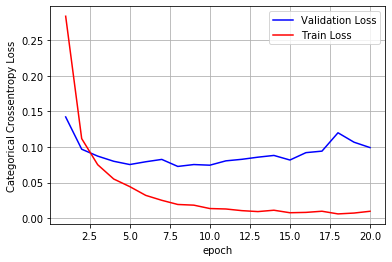

In [26]:
score = model_relu_1.evaluate(X_test, Y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **2. Architecture: 3 Hidden Layers (784-512-256-128-10)**

With Batch Normalization

In [0]:
model_relu_2 = Sequential()

model_relu_2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='glorot_normal'))
model_relu_2.add(BatchNormalization())
model_relu_2.add(Dropout(0.5))

model_relu_2.add(Dense(256, activation='relu', kernel_initializer='glorot_normal'))
model_relu_2.add(BatchNormalization())
model_relu_2.add(Dropout(0.5))

model_relu_2.add(Dense(128, activation='relu', kernel_initializer='glorot_normal'))
model_relu_2.add(BatchNormalization())
model_relu_2.add(Dropout(0.5))

model_relu_2.add(Dense(output_dim, activation='softmax'))

In [30]:
model_relu_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.5308 - acc: 0.8401 - val_loss: 0.1612 - val_acc: 0.9524
Epoch 2/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2390 - acc: 0.9292 - val_loss: 0.1186 - val_acc: 0.9644
Epoch 3/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.1795 - acc: 0.9472 - val_loss: 0.1018 - val_acc: 0.9699
Epoch 4/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1573 - acc: 0.9536 - val_loss: 0.0925 - val_acc: 0.9722
Epoch 5/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.1416 - acc: 0.9577 - val_loss: 0.0872 - val_acc: 0.9743
Epoch 6/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1269 - acc: 0.9619 - val_loss: 0.0781 - val_acc: 0.9773
Epoch 7/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.1178 - acc: 0.9648 - val_loss: 0.

Test score: 0.06115838211502996
Test accuracy: 0.9818


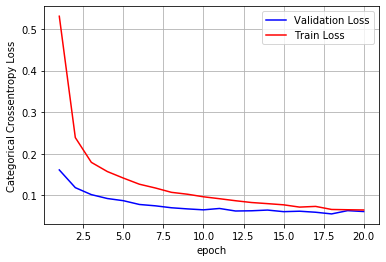

In [31]:
score = model_relu_2.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Without Batch Normalization

In [0]:
model_relu_2 = Sequential()

model_relu_2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='glorot_normal'))

model_relu_2.add(Dense(256, activation='relu', kernel_initializer='glorot_normal'))

model_relu_2.add(Dense(128, activation='relu', kernel_initializer='glorot_normal'))

model_relu_2.add(Dense(output_dim, activation='softmax'))

In [33]:
model_relu_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.2272 - acc: 0.9325 - val_loss: 0.1453 - val_acc: 0.9525
Epoch 2/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0865 - acc: 0.9739 - val_loss: 0.0795 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0544 - acc: 0.9829 - val_loss: 0.0841 - val_acc: 0.9728
Epoch 4/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0418 - acc: 0.9867 - val_loss: 0.0668 - val_acc: 0.9800
Epoch 5/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0316 - acc: 0.9898 - val_loss: 0.0729 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0244 - acc: 0.9917 - val_loss: 0.0880 - val_acc: 0.9746
Epoch 7/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0233 - acc: 0.9922 - val_loss: 0.0907 - 

Test score: 0.084612847658376
Test accuracy: 0.9821


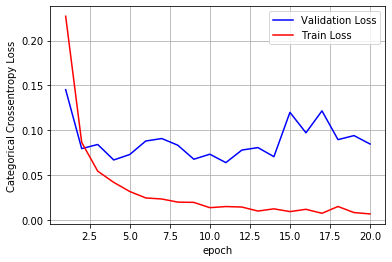

In [34]:
score = model_relu_2.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## **3. Architecture: 5 Hidden Layers (784-512-256-128-64-32-10)**

With Batch Normalization

In [0]:
model_relu_3 = Sequential()

model_relu_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='glorot_normal'))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dropout(0.5))

model_relu_3.add(Dense(256, activation='relu', kernel_initializer='glorot_normal'))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dropout(0.5))

model_relu_3.add(Dense(128, activation='relu', kernel_initializer='glorot_normal'))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dropout(0.5))

model_relu_3.add(Dense(64, activation='relu', kernel_initializer='glorot_normal'))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dropout(0.5))

model_relu_3.add(Dense(32, activation='relu', kernel_initializer='glorot_normal'))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dropout(0.5))

model_relu_3.add(Dense(output_dim, activation='softmax'))

In [36]:
model_relu_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 220us/step - loss: 1.3623 - acc: 0.5673 - val_loss: 0.2719 - val_acc: 0.9246
Epoch 2/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.5217 - acc: 0.8631 - val_loss: 0.1877 - val_acc: 0.9488
Epoch 3/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.3646 - acc: 0.9108 - val_loss: 0.1580 - val_acc: 0.9578
Epoch 4/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.3042 - acc: 0.9275 - val_loss: 0.1363 - val_acc: 0.9671
Epoch 5/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.2670 - acc: 0.9376 - val_loss: 0.1194 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.2404 - acc: 0.9441 - val_loss: 0.1148 - val_acc: 0.9704
Epoch 7/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.2177 - acc: 0.9492 - val_loss: 0.

Test score: 0.08003878279228228
Test accuracy: 0.9816


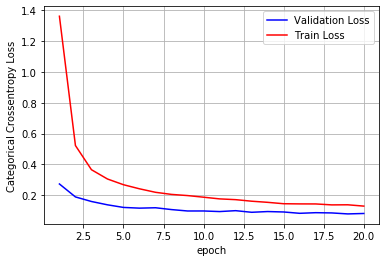

In [37]:
score = model_relu_3.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Without Batch Normalization

In [0]:
model_relu_3 = Sequential()

model_relu_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='glorot_normal'))

model_relu_3.add(Dense(256, activation='relu', kernel_initializer='glorot_normal'))

model_relu_3.add(Dense(128, activation='relu', kernel_initializer='glorot_normal'))

model_relu_3.add(Dense(64, activation='relu', kernel_initializer='glorot_normal'))

model_relu_3.add(Dense(32, activation='relu', kernel_initializer='glorot_normal'))

model_relu_3.add(Dense(output_dim, activation='softmax'))

In [39]:
model_relu_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2607 - acc: 0.9216 - val_loss: 0.1193 - val_acc: 0.9627
Epoch 2/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0951 - acc: 0.9711 - val_loss: 0.0980 - val_acc: 0.9683
Epoch 3/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0625 - acc: 0.9802 - val_loss: 0.0891 - val_acc: 0.9707
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0480 - acc: 0.9846 - val_loss: 0.0718 - val_acc: 0.9784
Epoch 5/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0341 - acc: 0.9889 - val_loss: 0.0754 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0303 - acc: 0.9903 - val_loss: 0.0998 - val_acc: 0.9712
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0279 - acc: 0.9911 - val_loss: 0.0789 -

Test score: 0.07785627461677641
Test accuracy: 0.9829


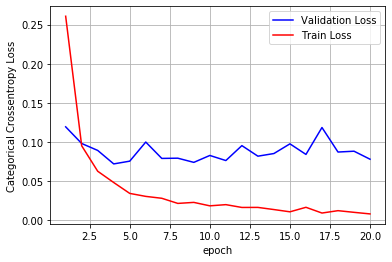

In [40]:
score = model_relu_3.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [2]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ['No. of Layers', 'Batch Normalisation and Dropouts', 'Test Score', 'Test Accuracy', 'Convergence']

table.add_row(['2', 'Yes', '6.81', '97.98', 'Quick'])
table.add_row(['2', 'No', '9.91', '97.94', 'Slow'])
table.add_row(['3', 'Yes', '6.12', '98.18', 'Quick'])
table.add_row(['3', 'No', '8.46', '98.21', 'Slow'])
table.add_row(['5', 'Yes', '8.00', '98.16', 'Quick'])
table.add_row(['5', 'No', '7.79', '98.29', 'Slow'])

print(table)

+---------------+----------------------------------+------------+---------------+-------------+
| No. of Layers | Batch Normalisation and Dropouts | Test Score | Test Accuracy | Convergence |
+---------------+----------------------------------+------------+---------------+-------------+
|       2       |               Yes                |    6.81    |     97.98     |    Quick    |
|       2       |                No                |    9.91    |     97.94     |     Slow    |
|       3       |               Yes                |    6.12    |     98.18     |    Quick    |
|       3       |                No                |    8.46    |     98.21     |     Slow    |
|       5       |               Yes                |    8.00    |     98.16     |    Quick    |
|       5       |                No                |    7.79    |     98.29     |     Slow    |
+---------------+----------------------------------+------------+---------------+-------------+
